In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import struct
import tensorflow as tf

# Load Data

In [70]:
# Which dataset to use
typ = 'nist'

# Loading in data files
train_images_file = f"{typ}_data/train_images.pkl"
train_labels_file = f"{typ}_data/train_labels.pkl"

test_images_file = f"{typ}_data/test_images.pkl"
test_labels_file = f"{typ}_data/test_labels.pkl"

def unload_file(filename):
    with open(filename, 'rb') as f:
        # zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        # shape = tuple(struct.unpack('>I', f.read(4))[0] for _ in range(dims))
        # return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

        return pickle.load(f)


train_images = unload_file(train_images_file).astype(np.float16)
train_labels = unload_file(train_labels_file)

test_images = unload_file(test_images_file).astype(np.float16)
test_labels = unload_file(test_labels_file)

train_images_size = np.shape(train_images)[0]
test_images_size = np.shape(test_images)[0]

num_pixels = np.shape(train_images)[1]

# Normalize Data

In [3]:
train_images /= 255
test_images /= 255

In [49]:
print(train_images.shape, train_images.dtype)
print(train_labels.shape, train_labels.dtype)
print(test_images.shape, test_images.dtype)
print(test_labels.shape, test_labels.dtype)

(60000, 28, 28) float16
(60000,) uint8
(10000, 28, 28) float16
(10000,) uint8


# View Sample Data

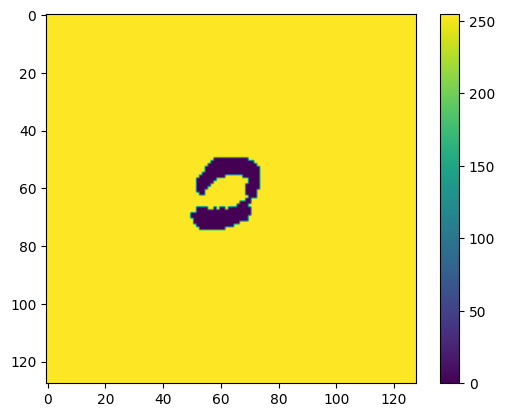

0


In [71]:
# Show example images
from time import sleep
for n in range(1):
    plt.figure()
    plt.imshow(train_images[n])
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(train_labels[n])
    sleep(2)

# Create & Train Model

In [5]:
# Create model of Sequential neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(num_pixels, num_pixels)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Compiile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [123]:
# new_train_images = np.empty([70000, 28, 28], dtype=np.float16)
# new_train_labels = np.empty([70000], dtype=np.uint8)

# new_train_images[:60000] = train_images
# new_train_images[60000:] = test_images

# new_train_labels[:60000] = train_labels
# new_train_labels[60000:] = test_labels

# model.fit(
#     new_train_images,
#     new_train_labels,
#     epochs=100
# )

In [43]:
with open('tf_models_mnist/tf_model_final.pkl', 'rb') as f:
    model = pickle.load(f)

In [11]:
# Train the model
model.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
10760/10760 [==============================] - 111s 10ms/step - loss: 0.1264 - sparse_categorical_accuracy: 0.9647
Epoch 2/10
10760/10760 [==============================] - 111s 10ms/step - loss: 0.1165 - sparse_categorical_accuracy: 0.9667
Epoch 3/10
10760/10760 [==============================] - 111s 10ms/step - loss: 0.1284 - sparse_categorical_accuracy: 0.9633
Epoch 4/10
10760/10760 [==============================] - 111s 10ms/step - loss: 0.1078 - sparse_categorical_accuracy: 0.9700
Epoch 5/10
10760/10760 [==============================] - 111s 10ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0.9632
Epoch 6/10
10760/10760 [==============================] - 111s 10ms/step - loss: 0.1000 - sparse_categorical_accuracy: 0.9724
Epoch 7/10
10760/10760 [==============================] - 111s 10ms/step - loss: 0.1134 - sparse_categorical_accuracy: 0.9690
Epoch 8/10
10760/10760 [==============================] - 110s 10ms/step - loss: 0.1123 - sparse_categorical_accuracy:

# Test Model

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy: ', test_acc)

275/313 [=========================>....] - ETA: 0s - loss: 59.3973 - sparse_categorical_accuracy: 0.9819

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 0s 554us/step - loss: 58.9589 - sparse_categorical_accuracy: 0.9827
Test accuracy:  0.982699990272522


# Save Model

In [14]:
acc = str(test_acc)[2:6]
with open(f'tf_models_{typ}/tf_model_{acc}.pkl', 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://76391476-6822-4d43-8598-d3200b088e51/assets


In [63]:
import time
with open(f'knn_classifiers_mnist/knn_classifier.pkl', 'rb') as f:
    knn = pickle.load(f)

In [62]:
times = []
for n in range(20):
    start = time.time()
    pred = model.predict(test_images[n].reshape([1, num_pixels, num_pixels]))
    end = time.time()
    times.append(end-start)
    pred = list(pred[0]).index(1)
    # print(pred)
    # plt.figure()
    # plt.imshow(test_images[n])
    # plt.colorbar()
    # plt.grid(False)
    # plt.show()

print(sum(times)/len(times))

1/1 [==============================] - 0s 9ms/step
0.02246546745300293


In [67]:
times = []
for n in range(20):
    start = time.time()
    pred = knn.predict(test_images[n].reshape([1, num_pixels*num_pixels]))
    end = time.time()
    times.append(end-start)
    # print(pred)
    # plt.figure()
    # plt.imshow(test_images[n])
    # plt.colorbar()
    # plt.grid(False)
    # plt.show()

print(sum(times)/len(times))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will 

0.11241583824157715


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
